In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv(r"C:\Users\ASUS\Downloads\Indian automoble buying behavour study 1.0.csv")
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [4]:
df.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [5]:
df.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

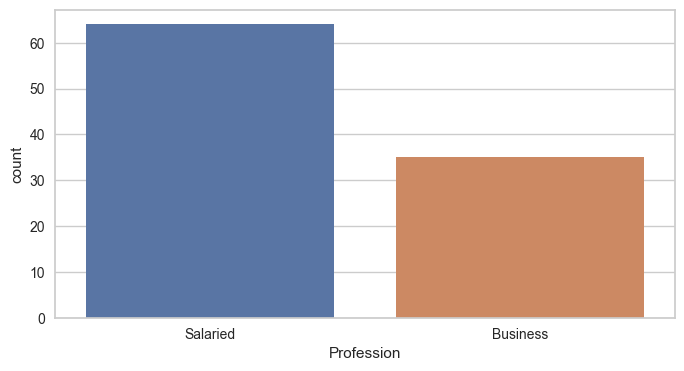

In [6]:
    plt.figure(figsize=(8, 4))
    sns.countplot(x='Profession', data=df, palette='deep', hue='Profession')
    plt.show()

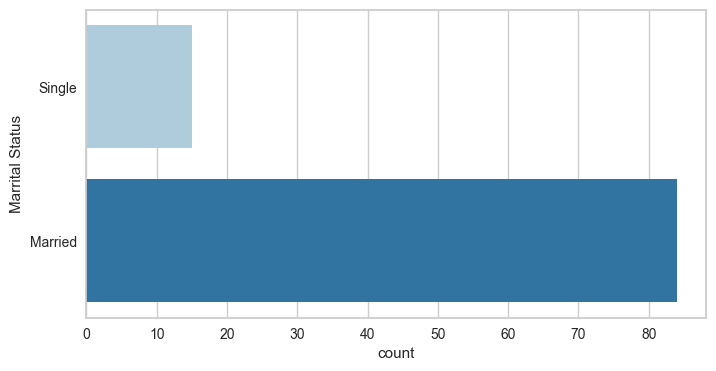

In [7]:
    plt.figure(figsize=(8, 4))
    sns.countplot(y='Marrital Status', data=df, palette='Paired', hue='Marrital Status')
    plt.show()

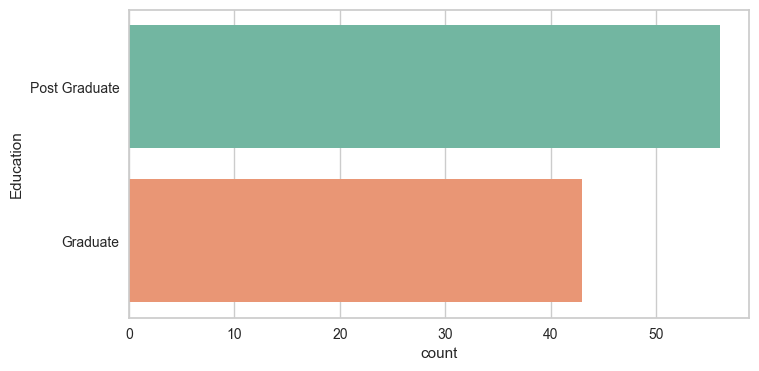

In [8]:
    plt.figure(figsize=(8, 4))
    sns.countplot(y='Education', data=df, palette='Set2', hue='Education')
    plt.show()

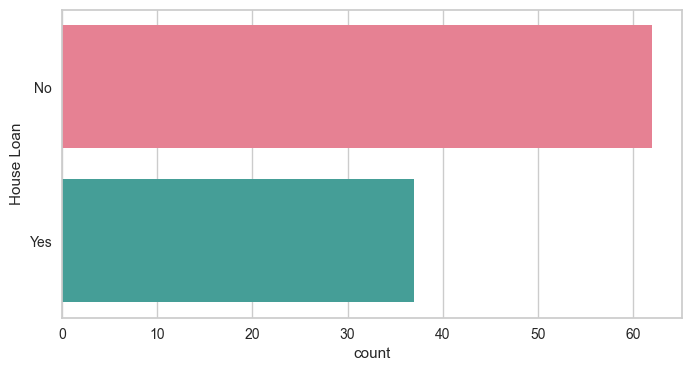

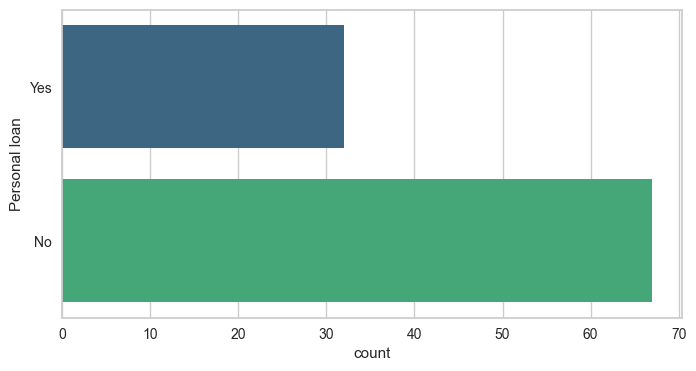

In [9]:
plt.figure(figsize=(8, 4))
sns.countplot(y='House Loan', data=df, palette='husl', hue='House Loan')
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(y='Personal loan', data=df, palette='viridis', hue='Personal loan')
plt.show()

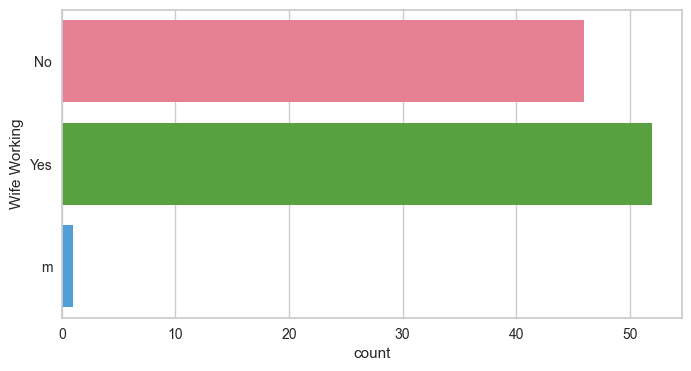

In [10]:
plt.figure(figsize=(8, 4))
sns.countplot(y='Wife Working', data=df, palette='husl', hue='Wife Working')
plt.show()

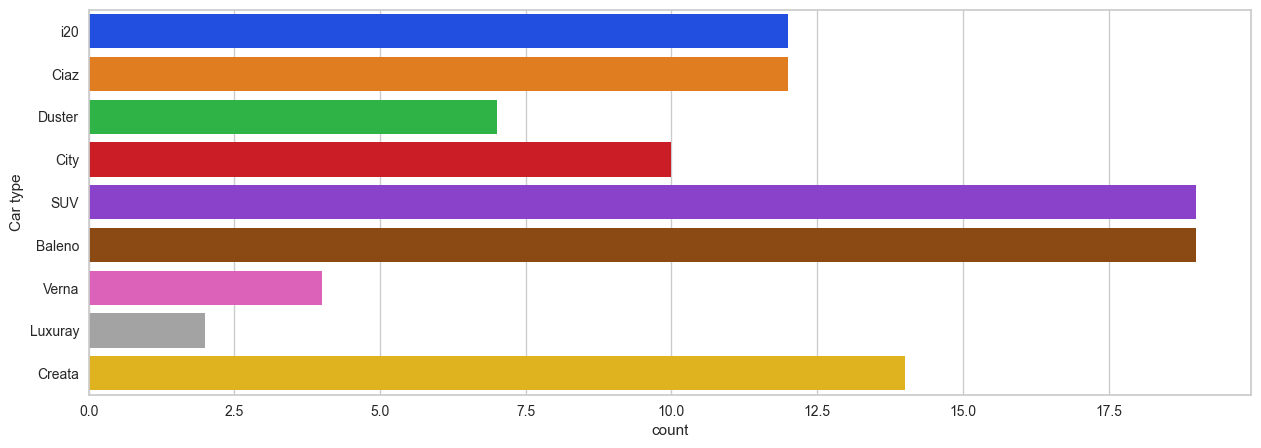

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(y='Make',data=df, palette='bright', hue='Make')
plt.ylabel('Car type')
plt.show()    

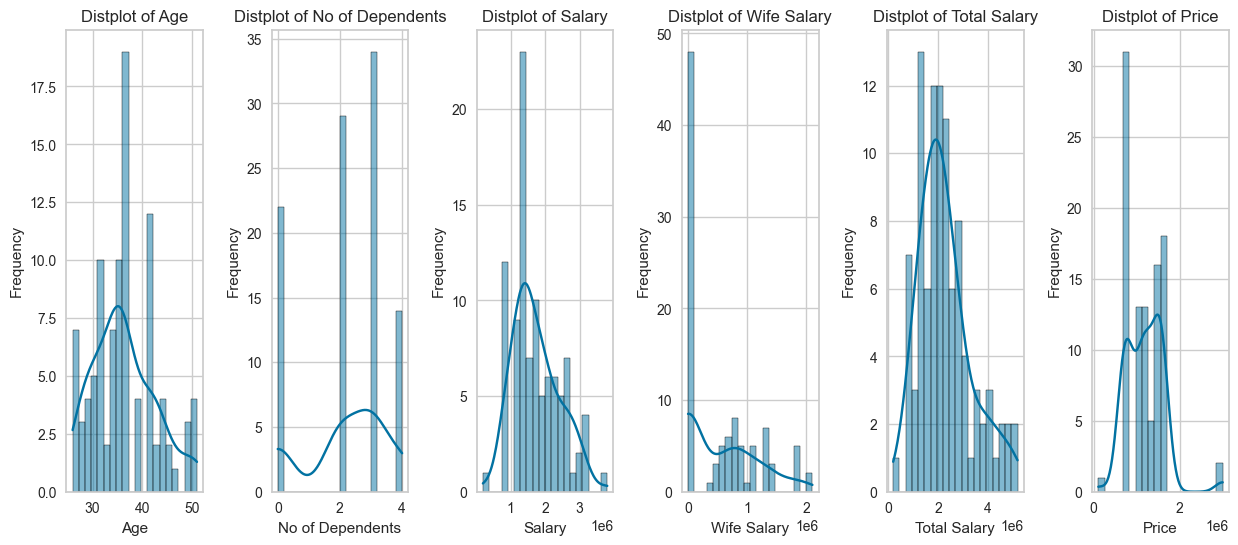

In [12]:
plt.figure(1, figsize=(15, 6))
n = 0
for x in ['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'Price']:
    n += 1
    plt.subplot(1, 6, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(df[x], bins=20, kde=True)
    plt.title('Distplot of {}'.format(x))
    plt.xlabel(x)
    plt.ylabel('Frequency')

plt.show()


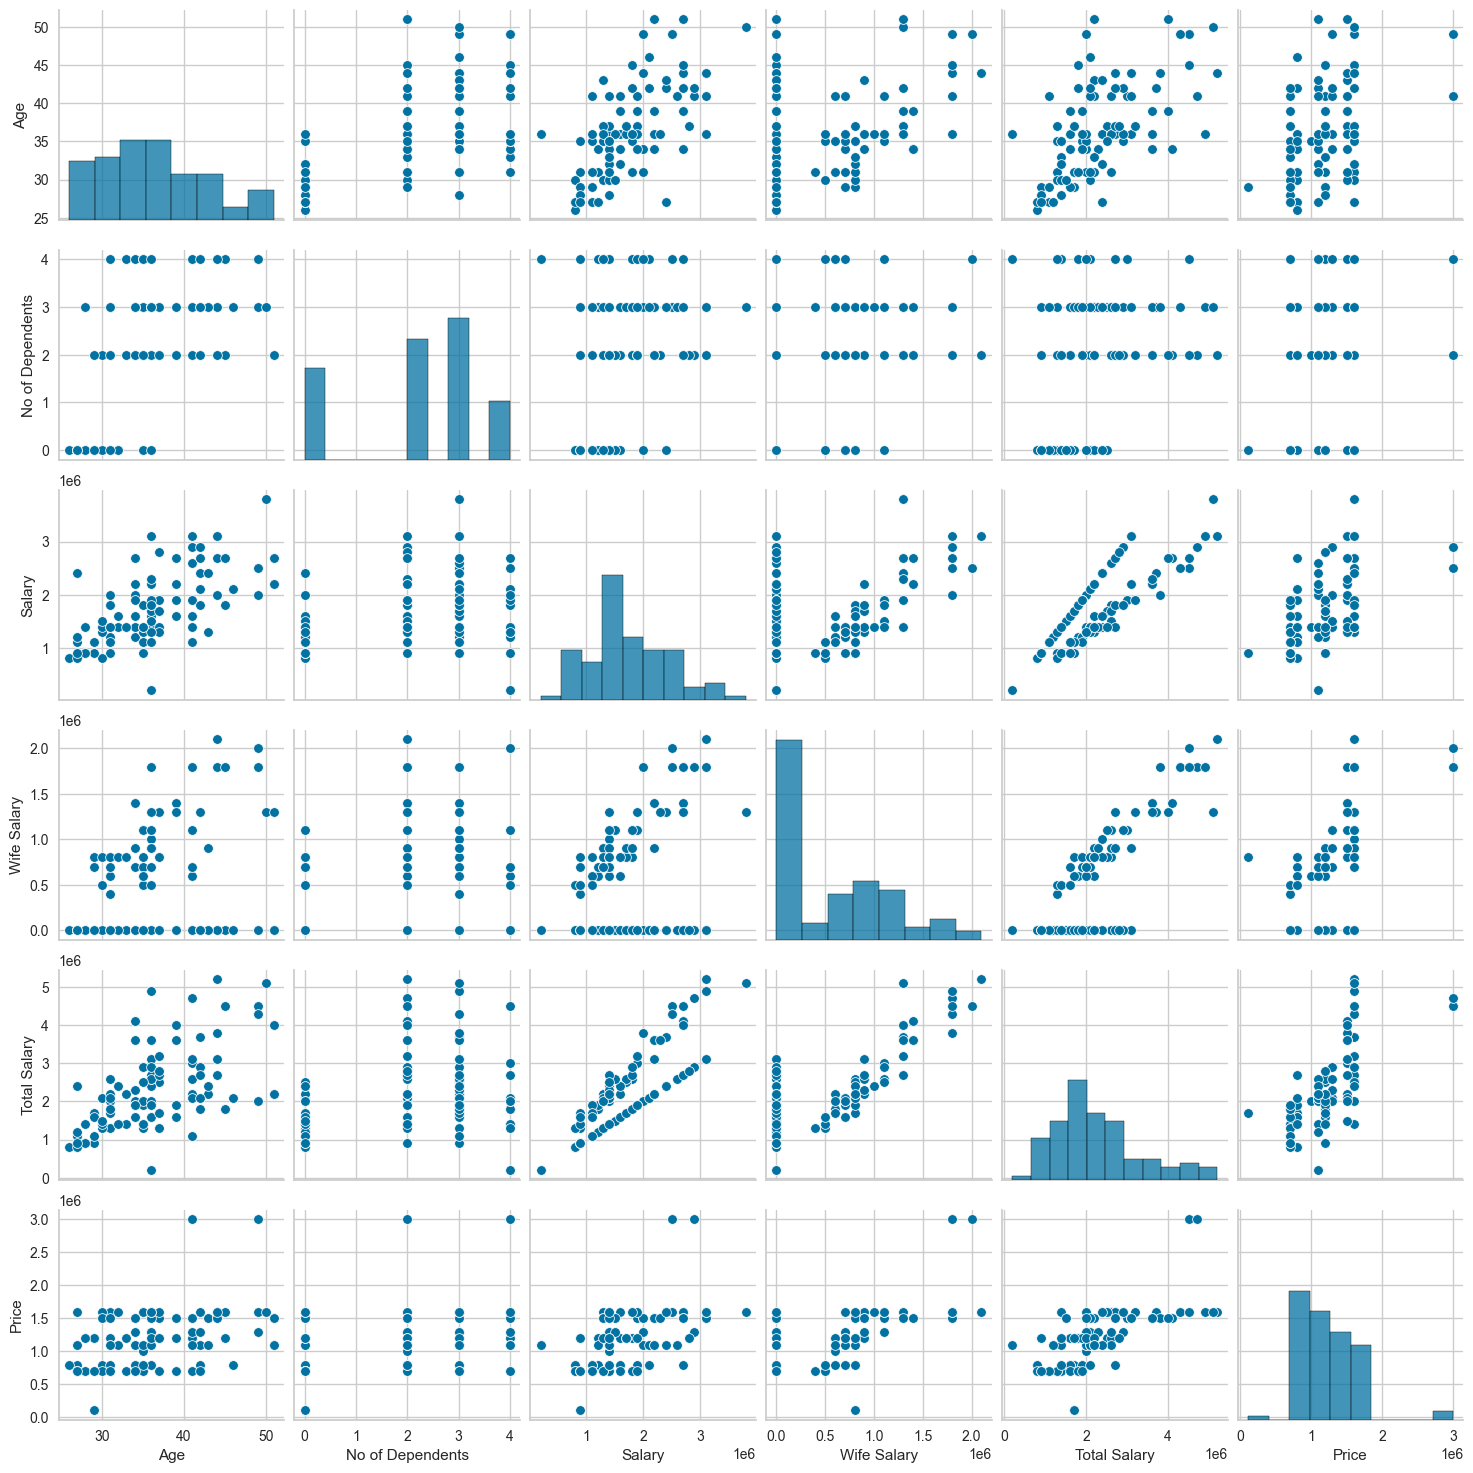

In [13]:
sns.pairplot(df[['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'Price']])
plt.show()

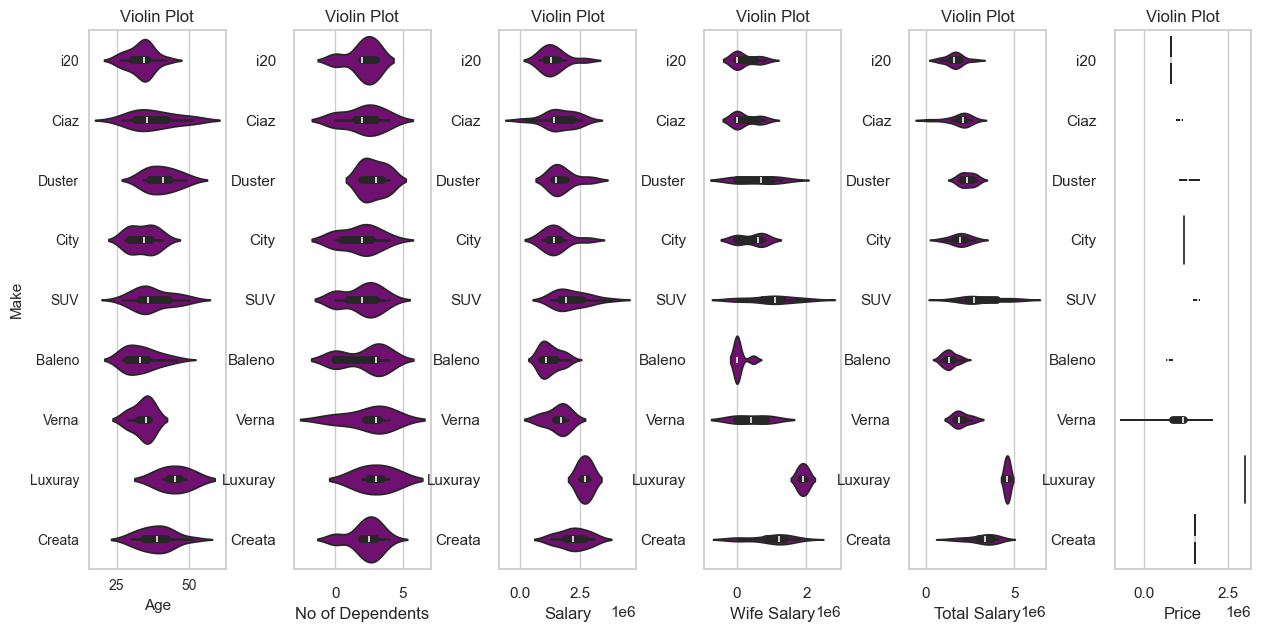

In [14]:
plt.figure(1,figsize=(15,7))
n = 0
for cols in ['Age','No of Dependents','Salary','Wife Salary','Total Salary','Price']:
  n += 1
  plt.subplot(1,6,n)
  sns.set(style = 'whitegrid')
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.violinplot(x= cols, y = 'Make', data=df, color='purple')
  plt.ylabel("Make" if n==1 else '')
  plt.title('Violin Plot')

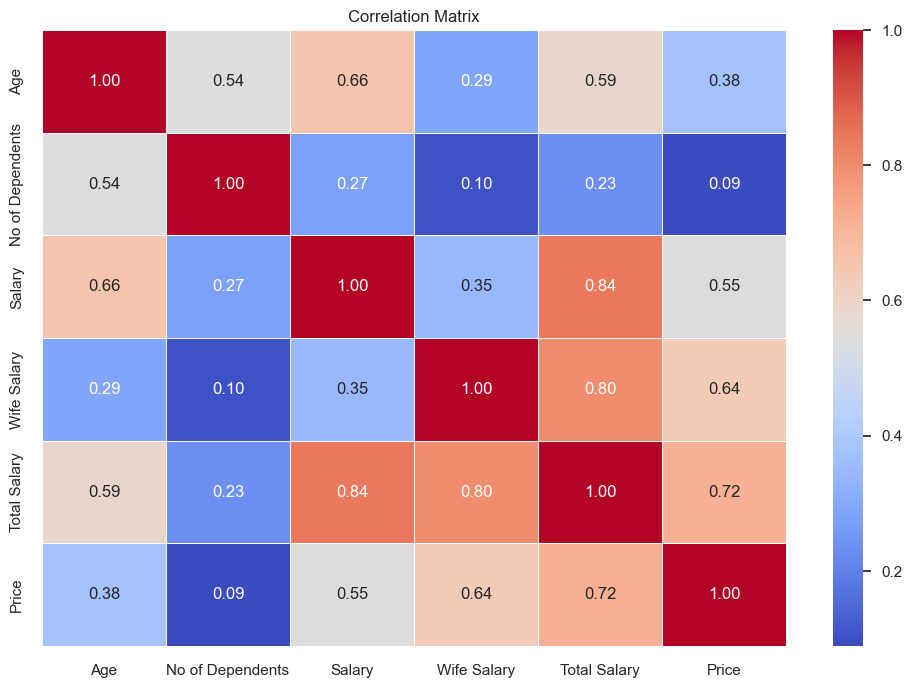

In [15]:
numerical_cols = ['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'Price']
correlation_df = df[numerical_cols]
correlation_matrix = correlation_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

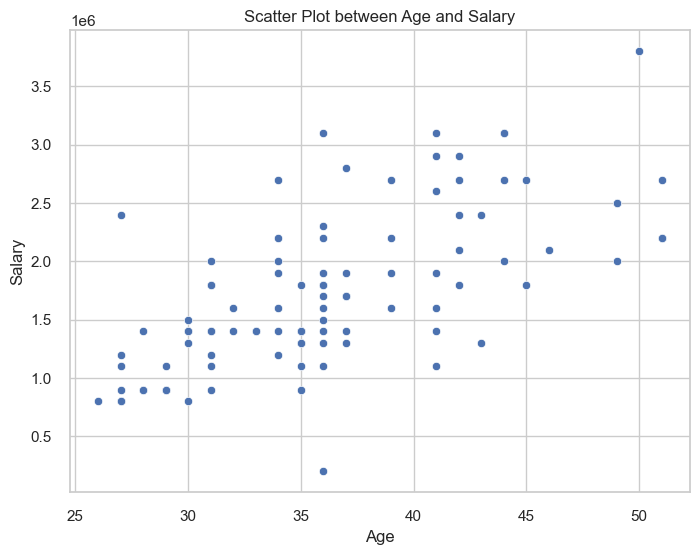

In [16]:
numerical_pairs = [('Age', 'Salary')]
for pair in numerical_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pair[0], y=pair[1], data=df)
    plt.title(f'Scatter Plot between {pair[0]} and {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.show()

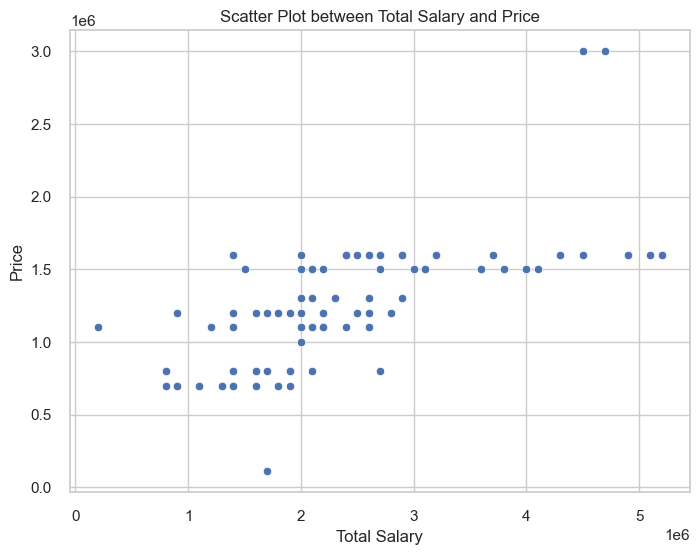

In [17]:
numerical_pairs = [('Total Salary', 'Price')]
for pair in numerical_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pair[0], y=pair[1], data=df)
    plt.title(f'Scatter Plot between {pair[0]} and {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.show()

<Axes: xlabel='Make', ylabel='count'>

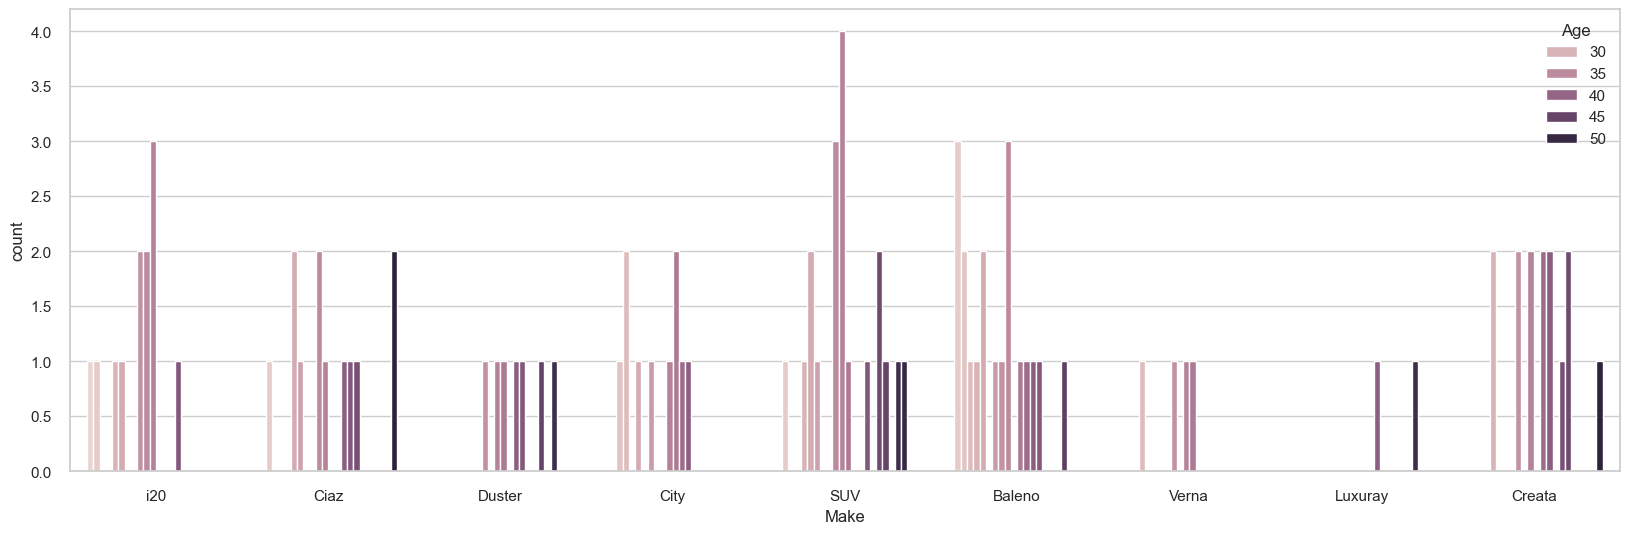

In [18]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Age")

<Axes: xlabel='Make', ylabel='count'>

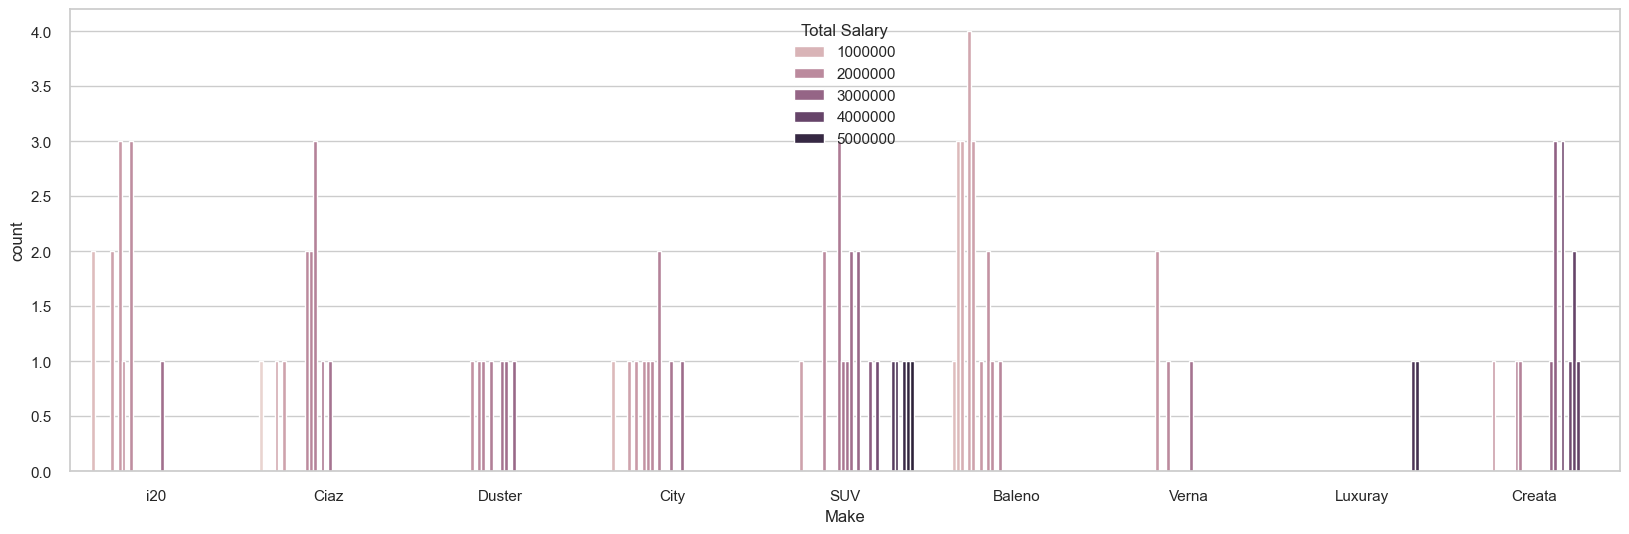

In [19]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Total Salary")

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

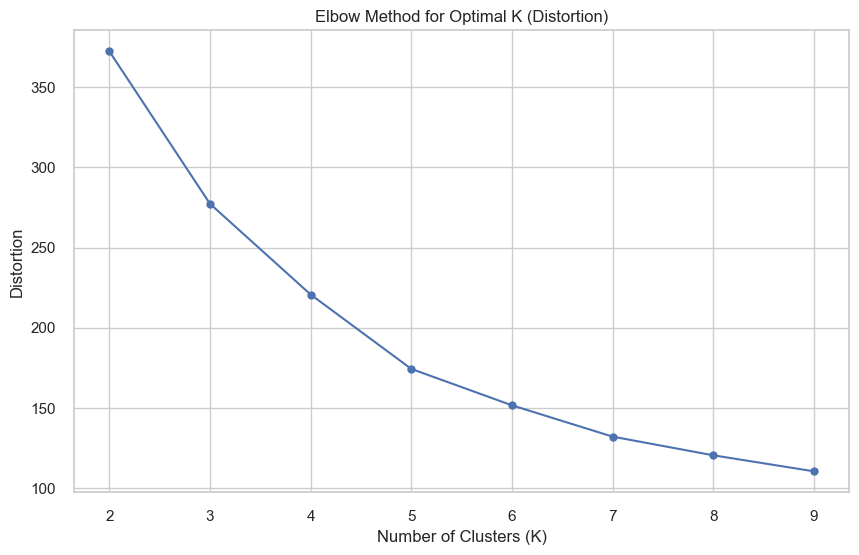

In [20]:
features_for_clustering = ['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'Price']
x_clustering = df[features_for_clustering].values
x_clustering_standardized = StandardScaler().fit_transform(x_clustering)

x_clustering_standardized = StandardScaler().fit_transform(x_clustering)
distortions = []
K_range = range(2, 10)

for k in K_range:
    model_clustering = KMeans(n_clusters=k, random_state=40)
    model_clustering.fit(x_clustering_standardized)
    distortions.append(model_clustering.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, distortions, marker='o')
plt.title('Elbow Method for Optimal K (Distortion)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.grid(True)
plt.show()

In [21]:
k_value = 3
model_clustering = KMeans(n_clusters=k_value, random_state=40, n_init=10)
model_clustering.fit(x_clustering_standardized)
distortion_score = model_clustering.inertia_
print(f"Distortion score for k={k_value}: {distortion_score}")

Distortion score for k=3: 277.3334628728386


In [22]:
n_clusters_clustering = 3  # Choose the optimal number of clusters based on the elbow method
kmeans_clustering = KMeans(n_clusters=n_clusters_clustering, random_state=40)
df['Cluster'] = kmeans_clustering.fit_predict(x_clustering_standardized)

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [23]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Cluster
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,2
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,0
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,0
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,0
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,0


In [24]:
clusters = kmeans_clustering.labels_

In [25]:
clusters

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 2, 2, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 2, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 0, 1, 0])

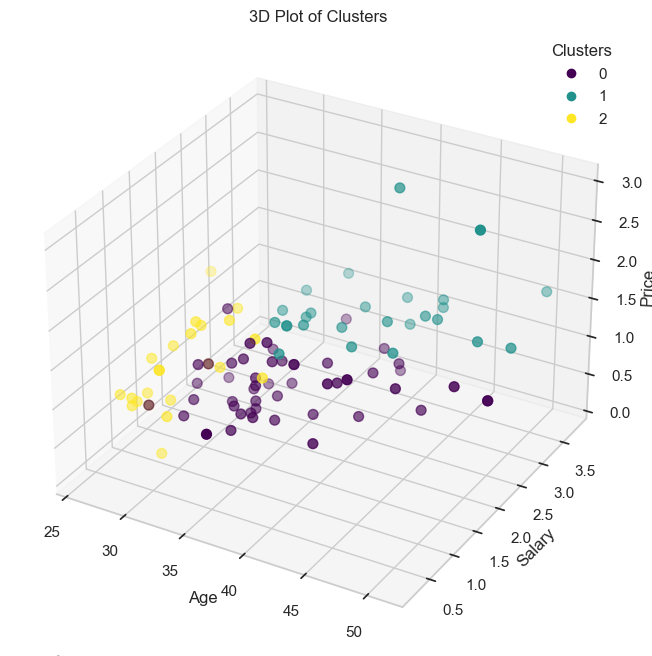

In [28]:
# 3D Plot for KMeans Clustering
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Age'], df['Salary'], df['Price'], c=df['Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Salary')
ax.set_zlabel('Price')
ax.set_title('3D Plot of Clusters')
ax.legend(*scatter.legend_elements(), title="Clusters")
plt.show(

In [27]:
cluster_analysis = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Salary': 'mean',
    'Price': 'mean',
})

# Include 'Make' column for comparison
cluster_analysis['Popular_Make'] = df.groupby('Cluster')['Make'].agg(lambda x: x.value_counts().index[0])

# Display the cluster analysis
print(cluster_analysis)


               Age        Salary         Price Popular_Make
Cluster                                                    
0        37.120000  1.586000e+06  1.008000e+06       Baleno
1        40.846154  2.476923e+06  1.650000e+06          SUV
2        29.434783  1.226087e+06  1.083043e+06       Baleno
